In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from IPython.display import Image
#import pydotplus
from sklearn.tree import export_graphviz

import warnings; warnings.simplefilter('ignore')


from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#read in survey data and drop misc. columns
surveyData = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv")
print(surveyData.shape)
surveyData = surveyData.drop(['#', '<strong>Do you have previous employers?</strong>', '<strong>Are you self-employed?</strong>', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'], axis = 1)
print(surveyData.shape)

#how many respondents answered all questions?
all_row = surveyData.dropna(axis=0)
print(all_row.shape)

#how many questions were answered by all respondents 
all_col = surveyData.dropna(axis=1)
print(all_col.shape)

surveyData.head(50)

(756, 123)
(756, 117)
(0, 117)
(756, 8)


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",<strong>Would you have been willing to discuss your ment

In [4]:
#look at how many respondents answered each question
surveyData_resp_counts_sorted = surveyData.count(axis = 0).sort_values()
print(surveyData_resp_counts_sorted.shape)
print(surveyData_resp_counts_sorted)

(117,)
Addictive Disorder                                                                                                                                                                                                                           0
Other                                                                                                                                                                                                                                        0
Substance Use Disorder                                                                                                                                                                                                                       0
Dissociative Disorder                                                                                                                                                                                                                        0
Stress Response Syndromes            

(756, 42)


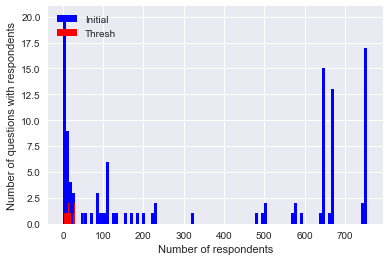

In [5]:
#visualize response
surveyData_resp_counts_sorted.hist(bins = 100, color="blue", label = 'Initial')
plt.xlabel('Number of respondents')
plt.ylabel('Number of questions with respondents')
plt.legend(loc='upper left')

#select questions with few answers which will encompass the mental health diagnosis columns
surveyData_resp_counts = pd.DataFrame(data = surveyData.count(axis = 0)).T
surveyData_resp_counts = surveyData_resp_counts[surveyData_resp_counts < 90]
surveyData_resp_counts = surveyData_resp_counts.dropna(axis = 1)
surveyData_resp_thresh = surveyData[surveyData_resp_counts.columns]
print(surveyData_resp_thresh.shape)

#visualize new data set
surveyData_resp_thresh_counts = surveyData_resp_thresh.count(axis = 0).sort_values()
surveyData_resp_thresh_counts.hist(bins = 100, color="red", label = 'Thresh')
plt.legend(loc='upper left')

In [6]:
#get column names of MH diagnosis, 
answers = surveyData_resp_thresh.filter(like='.1', axis=1).columns.values
print(answers)
#select rows that answered yes to at least one MH diagnosis
MH_answers = surveyData_resp_thresh[answers].dropna(axis = 0, thresh = 1)
print(MH_answers.shape)
MH_answers.head()

['Mood Disorder (Depression, Bipolar Disorder, etc).1'
 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1'
 'Eating Disorder (Anorexia, Bulimia, etc).1'
 'Attention Deficit Hyperactivity Disorder.1'
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1'
 'Obsessive-Compulsive Disorder.1' 'Stress Response Syndromes.1'
 'Dissociative Disorder.1' 'Substance Use Disorder.1'
 'Addictive Disorder.1' 'Other.1' 'Post-traumatic Stress Disorder.1']
(180, 12)


,"Mood Disorder (Depression, Bipolar Disorder, etc).1","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Other.1,Post-traumatic Stress Disorder.1
1,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Attention Deficit Hyperactivity Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post-traumatic Stress Disorder
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post-traumatic Stress Disorder
16,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,Stress Response Syndromes,NaN,NaN,NaN,NaN,NaN


In [7]:
#get index of respondents that answerd yes to at least one MH diagnosis and create new data table with only these respondents
surveyData_MH = surveyData.iloc[MH_answers.index.values]
surveyData_MH = surveyData_MH.dropna(axis = 1, thresh = 1)
print(surveyData_MH.shape)
surveyData_MH.head()

(180, 102)


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",<strong>Would you have been willing to discuss your ment

In [8]:
#remove questions with free answer format
why = surveyData_MH.filter(like='Why', axis=1).columns.values
briefly  = surveyData_MH.filter(like='Briefly', axis=1).columns.values
describe  = surveyData_MH.filter(like='Describe', axis=1).columns.values
previous  = surveyData_MH.filter(like='previous', axis=1).columns.values
surveyData_MH.drop(why, inplace=True, axis=1)
surveyData_MH.drop(briefly, inplace=True, axis=1)
#surveyData_MH.drop(describe, inplace=True, axis=1)
surveyData_MH.drop(previous, inplace=True, axis=1)
print(surveyData_MH.shape)

(180, 83)


In [9]:
col_names = surveyData_MH.columns.values
col_names

array(['How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel mor

In [10]:
col_names_short = ['How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
       'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
       'Have you ever discussed your mental health with your employer?',
       'Would you feel comfortable discussing a mental health issue with your coworkers?',
       'Have you ever discussed your mental health with coworkers?',
       'Overall, how much importance does your employer place on physical health?',
       'Overall, how much importance does your employer place on mental health?',
       'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
       '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>',
       'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
       '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>',
       'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
       'Do you believe your productivity is ever affected by a mental health issue?',
       'Do you currently have a mental health disorder?',
       'Have you ever been diagnosed with a mental health disorder?',
       'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
       'Mood Disorder (Depression, Bipolar Disorder, etc).1',
       'Eating Disorder (Anorexia, Bulimia, etc).1',
       'Attention Deficit Hyperactivity Disorder.1',
       'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
       'Obsessive-Compulsive Disorder.1',
       'Stress Response Syndromes.1', 'Dissociative Disorder.1',
       'Substance Use Disorder.1', 'Addictive Disorder.1',
       'Post-traumatic Stress Disorder.1',
       'Have you ever sought treatment for a mental health disorder from a mental health professional?',
       'Do you have a family history of mental illness?',
       'How willing would you be to share with friends and family that you have a mental illness?',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
       'Would you bring up your mental health with a potential employer in an interview?',
       'Are you openly identified at work as a person with a mental health issue?',
       'Has being identified as a person with a mental health issue affected your career?',
       'Overall, how well do you think the tech industry supports employees with mental health issues?',
       'What is your age?', 'What is your gender?']

col_names_short

['How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Have you ever discussed your mental health with your employer?',
 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'Have you ever discussed your mental health with coworkers?',
 'Overall, how much importance does your employer place on physical health?',
 'Overall, how much importance does your employer place on mental health?',
 'Do you 

In [11]:
surveyData_MH_final = surveyData_MH[col_names_short]
print(surveyData_MH_final.shape)
surveyData_MH_final.count(axis = 0).sort_values()

(180, 41)


Eating Disorder (Anorexia, Bulimia, etc).1                                                                                                         2
Dissociative Disorder.1                                                                                                                            4
Addictive Disorder.1                                                                                                                               7
Substance Use Disorder.1                                                                                                                           8
Stress Response Syndromes.1                                                                                                                       13
Personality Disorder (Borderline, Antisocial, Paranoid, etc).1                                                                                    14
If you have revealed a mental health disorder to a client or business contact, how has this affected you o

In [12]:
surveyData_MH_final.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1,Have you ever sought treatment for a mental health disorder from a mental health professional?,Do you have a family history of mental illness?,How willing would you be to share with friends and family that you have a mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,Are you openly identified at work as a person with a mental health issue?,Has being identified as a person with a mental health issue affected your career?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,What is your gender?
1,100-500,1.0,1.0,Yes,I don't know,Same level of comfort for each,Maybe,0.0,Yes,1.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Possibly,NaN,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No,4,Yes,No,0.0,NaN,2.0,31.0,male
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",No change,Unsure,Possibly,NaN,NaN,NaN,NaN,Attention Deficit Hyperactivity Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,No,4,Maybe,No,1.0,1.0,3.0,36.0,male
11,100-500,1.0,1.0,I don't know,Difficult,Physical health,Maybe,0.0,No,0.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post-traumatic Stress Disorder,0,Yes,10,No,No,0.0,NaN,1.0,35.0,Male
14,26-100,1.0,0.0,I don't know,Very easy,Same level of comfort for each,Maybe,1.0,Yes,1.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post-traumatic Stress Disorder,1,Yes,8,Yes,No,0.0,NaN,3.0,34.0,female
16,26-100,0.0,1.0,No,Neither easy nor difficult,Same level of comfort for each,Yes,0.0,Yes,1.0

In [33]:
surveyData_cont = surveyData_MH_final.select_dtypes(include=['float', 'int']).copy()
print(surveyData_cont.shape)
surveyData_cont.head()

(180, 12)


,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Are you openly identified at work as a person with a mental health issue?,Has being identified as a person with a mental health issue affected your career?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,Org_size
1,1.0,1.0,0.0,1.0,7.0,2.0,NaN,0.0,NaN,2.0,31.0,250.0
9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,36.0,NaN
11,1.0,1.0,0.0,0.0,5.0,3.0,NaN,0.0,NaN,1.0,35.0,250.0
14,1.0,0.0,1.0,1.0,5.0,5.0,NaN,0.0,NaN,3.0,34.0,75.0
16,0.0,1.0,0.0,1.0,9.0,9.0,NaN,1.0,0.0,5.0,38.0,75.0


In [54]:
surveyData_cat = surveyData_MH_final.select_dtypes(include=['object']).copy()
print(surveyData_cat.count(axis = 0).sort_values())
surveyData_cat = surveyData_cat.fillna(value = 0)
surveyData_cat.head()

Eating Disorder (Anorexia, Bulimia, etc).1                                                                                                         2
Dissociative Disorder.1                                                                                                                            4
Addictive Disorder.1                                                                                                                               7
Substance Use Disorder.1                                                                                                                           8
Stress Response Syndromes.1                                                                                                                       13
Personality Disorder (Borderline, Antisocial, Paranoid, etc).1                                                                                    14
If you have revealed a mental health disorder to a client or business contact, how has this affected you o

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1,Do you have a family history of mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,What is your gender?
1,100-500,Yes,I don't know,Same level of comfort for each,Maybe,Yes,0,0,0,0,0,Possibly,0,0,"Mood Disorder (Depression, Bipolar Disorder, etc)",0,0,0,0,0,0,0,0,0,No,Yes,No,M
9,0,0,0,0,0,0,"Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",No change,Unsure,Possibly,0,0,0,0,Attention Deficit Hyperactivity Disorder,0,0,0,0,0,0,0,No,Maybe,No,M
11,100-500,I don't know,Difficult,Physical health,Maybe,No,0,0,0,0,0,Yes,Yes,0,0,0,0,0,0,0,0,0,0,Post-traumatic Stress Disorder,Yes,No,No,M
14,26-100,I don't know,Very easy,Same level of comfort for each,Maybe,Yes,0,0,0,0,0,Yes,Yes,0,0,0,0,0,0,0,0,0,0,Post-traumatic Stress Disorder,Yes,Yes,No,F
16,26-100,No,Neither easy nor difficult,Same level of comfort for each,Yes,Yes,0,0,0,0,0,Possibly,0,"Anxiety Disorder (Generalized, Social, Phobia,...","Mood Disorder (Depression, Bipolar Disorder, etc)",0,0,0,0,Stress Response Syndromes,0,0,0,0,No,Yes,Yes,M


In [15]:
MH_diag_names = ['Anxiety Disorder (Generalized, Social, Phobia, etc).1',
       'Mood Disorder (Depression, Bipolar Disorder, etc).1',
       'Eating Disorder (Anorexia, Bulimia, etc).1',
       'Attention Deficit Hyperactivity Disorder.1',
       'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
       'Obsessive-Compulsive Disorder.1',
       'Stress Response Syndromes.1', 'Dissociative Disorder.1',
       'Substance Use Disorder.1', 'Addictive Disorder.1',
       'Post-traumatic Stress Disorder.1']
MH_diag = surveyData_MH_final[MH_diag_names]
MH_diag = MH_diag.fillna(value = 0)
MH_diag.head()

,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1
1,0,"Mood Disorder (Depression, Bipolar Disorder, etc)",0,0,0,0,0,0,0,0,0
9,0,0,0,Attention Deficit Hyperactivity Disorder,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,Post-traumatic Stress Disorder
14,0,0,0,0,0,0,0,0,0,0,Post-traumatic Stress Disorder
16,"Anxiety Disorder (Generalized, Social, Phobia,...","Mood Disorder (Depression, Bipolar Disorder, etc)",0,0,0,0,Stress Response Syndromes,0,0,0,0


In [31]:
MH_diag_cat= pd.DataFrame()
for name in MH_diag_names: 
    temp = MH_diag[name].astype('category', ordered=True).cat.codes
    MH_diag_cat[name] = temp

print(MH_diag_cat.shape)
MH_diag_cat.head()

(180, 11)


,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1
1,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,1
16,1,1,0,0,0,0,1,0,0,0,0


In [17]:
surveyData = surveyData_MH_final.copy()
surveyData['Gender_old'] = surveyData_MH_final['What is your gender?']
print(surveyData.Gender_old.value_counts())
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].fillna(value = 0)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[f].*', 'F', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[w].*', 'F', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[md][^y].*', 'M', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[ngau][egho][nhe].*', 'NB', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[c][i][s].{1,2}[mh].*', 'M', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[c][i][s].{1,2}[f].*', 'F', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[t].*', 'T', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[sgcm][yo][ nmd].*', 'NaN', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('\\\-', 'NaN', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('n/a', 'NaN', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('m', 'M', case=False)
surveyData_MH_final['What is your gender?'].value_counts()

Male                           67
Female                         29
male                           23
female                         16
m                               8
M                               7
Woman                           2
F                               2
cis-male                        1
Male-ish                        1
Nonbinary                       1
cis-Female                      1
nonbinary                       1
female (cisgender)              1
uhhhhhhhhh fem genderqueer?     1
female (cis)                    1
male/androgynous                1
n/a                             1
My sex is female.               1
femalw                          1
sometimes                       1
Agender/genderfluid             1
Transfeminine                   1
Male, cis                       1
Cis-male                        1
Female                          1
Genderfluid                     1
f                               1
Female-ish                      1
dude          

M      111
F       57
NB       5
NaN      3
T        1
Name: What is your gender?, dtype: int64

In [26]:
size = surveyData_MH_final['How many employees does your company or organization have?']
size = size.fillna('NaN')
size_cont = []
for i, row in size.iteritems():
    if row == '6-25':
        size = 15
        size_cont.append(size)
    if row == '100-500':
        size = 250
        size_cont.append(size)
    if row == 'NaN':
        size = None
        size_cont.append(size)
    if row == '26-100':
        size = 75
        size_cont.append(size)
    if row == '500-1000':
        size = 750
        size_cont.append(size)
    if row == 'More than 1000':
        size = 1000
        size_cont.append(size)
    if row == '1-5':
        size = 3
        size_cont.append(size)

len(size_cont)

surveyData_MH_final['Org_size'] = size_cont
print(surveyData_MH_final['Org_size'].unique())
print(surveyData_MH_final['Org_size'].value_counts())
surveyData_MH_final['Org_size']

[  250.    nan    75.    15.   750.  1000.     3.]
250.0     54
1000.0    38
15.0      23
75.0      21
750.0     10
3.0        7
Name: Org_size, dtype: int64


1       250.0
9         NaN
11      250.0
14       75.0
16       75.0
18       15.0
20       15.0
21      250.0
22       75.0
27      250.0
29        NaN
39      250.0
42      750.0
43      250.0
46     1000.0
48       15.0
51       15.0
54      750.0
56        NaN
74      250.0
75       75.0
80      250.0
87     1000.0
90      250.0
92      250.0
96        3.0
102      75.0
103    1000.0
109       NaN
111      15.0
113    1000.0
116    1000.0
128    1000.0
135       NaN
136      75.0
138       3.0
140    1000.0
143    1000.0
144    1000.0
147     750.0
152    1000.0
154     750.0
155    1000.0
159     250.0
163    1000.0
164       NaN
166     750.0
167      15.0
173      15.0
192     250.0
196      75.0
200     250.0
205    1000.0
207    1000.0
210     250.0
225       NaN
226    1000.0
227      15.0
229      15.0
233     250.0
238      75.0
239     250.0
242      75.0
247      75.0
254     250.0
259       3.0
261      15.0
263     250.0
265      15.0
269     250.0
270     250.0
274   

In [19]:
print(surveyData_MH_final["What is your gender?"].unique())
ordered_gender = ['NaN', 'T', 'NB', 'F', 'M']
surveyData_MH_final['Gender_cat'] = surveyData_MH_final["What is your gender?"].astype('category', ordered=True,
  categories=ordered_gender).cat.codes
print(surveyData_MH_final['Gender_cat'].unique())
print(surveyData_MH_final['Gender_cat'].value_counts())

['M' 'F' 'NB' 'NaN' nan 'T']
[ 4  3  2  0 -1  1]
 4    111
 3     57
 2      5
-1      3
 0      3
 1      1
Name: Gender_cat, dtype: int64


In [20]:
print(surveyData_MH_final["Do you currently have a mental health disorder?"].unique())
ordered_MH = ['No', 'Don\'t know', 'Possibly', 'Yes']
surveyData_MH_final['MH_status'] = surveyData_MH_final["Do you currently have a mental health disorder?"].astype('category', ordered=True,
  categories=ordered_MH).cat.codes
print(surveyData_MH_final['MH_status'].unique())
print(surveyData_MH_final['MH_status'].value_counts())

['Possibly' 'Yes']
[2 3]
2    122
3     58
Name: MH_status, dtype: int64


In [21]:
cat_names = surveyData_cat.columns.values
cat_names

array(['How many employees does your company or organization have?',
       'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
       'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
       'Would you feel comfortable discussing a mental health issue with your coworkers?',
       '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>',
       'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
       '<strong>If you have been diagnosed or treated for a mental health disorder, do you eve

In [55]:
cat_names_short = ['Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
       'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
       'Would you feel comfortable discussing a mental health issue with your coworkers?',
       'Have you ever been diagnosed with a mental health disorder?',
       'Do you have a family history of mental illness?',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
       'Would you bring up your mental health with a potential employer in an interview?']

In [56]:
MH_cat= pd.DataFrame()
for name in cat_names_short: 
    temp = surveyData_cat[name].astype('category', ordered=True).cat.codes
    MH_cat[name] = temp

print(MH_diag_cat.shape)
MH_cat.head()

(180, 11)


,Does your employer provide mental health benefits as part of healthcare coverage?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever been diagnosed with a mental health disorder?,Do you have a family history of mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?
1,4,2,3,1,3,0,1,2,1
9,0,0,0,0,0,0,1,0,1
11,1,1,2,1,2,1,2,1,1
14,1,6,3,1,3,1,2,2,1
16,2,3,3,3,3,0,1,2,2


In [25]:
surveyData_trans = surveyData_MH_final[['Org_size', 'What is your age?', 'MH_status', 'Gender_cat']]
#surveyData_short = surveyData_short[surveyData_short['MH_status'] > -1]
#surveyData_short = surveyData_short[surveyData_short['Gender_cat'] > 0]
print(surveyData_trans.shape)
surveyData_trans.head()

(180, 4)


,Org_size,What is your age?,MH_status,Gender_cat
1,250.0,31.0,2,4
9,NaN,36.0,2,4
11,250.0,35.0,3,4
14,75.0,34.0,3,3
16,75.0,38.0,2,4


In [57]:
frames = [surveyData_trans, MH_cat, MH_diag_cat, surveyData_cont]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.head()

(180, 36)


,Org_size,What is your age?,MH_status,Gender_cat,Does your employer provide mental health benefits as part of healthcare coverage?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever been diagnosed with a mental health disorder?,Do you have a family history of mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Are you openly identified at work as a person with a mental health issue?,Has being identified as a person with a mental health issue affected your career?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,Org_size
1,250.0,31.0,2,4,4,2,3,1,3,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,7.0,2.0,NaN,0.0,NaN,2.0,31.0,250.0
9,NaN,36.0,2,4,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,36.0,NaN
11,250.0,35.0,3,4,1,1,2,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,5.0,3.0,NaN,0.0,NaN,1.0,35.0,250.0
14,75.0,34.0,3,3,1,6,3,1,3,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,5.0,5.0,NaN,0.0,NaN,3.0,34.0,75.0
16,75.0,38.0,2,4,2,3,3,3,3,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,1.0,9.0,9.0,NaN,1.0,0.0,5.0,38.0,75.0


In [58]:
result.count(axis = 0).sort_values()

Has being identified as a person with a mental health issue affected your career?                                                        16
Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?                   27
Org_size                                                                                                                                153
Overall, how much importance does your employer place on mental health?                                                                 153
Overall, how much importance does your employer place on physical health?                                                               153
Have you ever discussed your mental health with coworkers?                                                                              153
Have you ever discussed your mental health with your employer?                                                                          153
Is your primary role

In [60]:
final_unsuper = result.dropna(axis = 1, thresh = 150).copy()
print(final_unsuper.shape)
final_unsuper = final_unsuper.dropna(axis = 0, thresh = 34)
print(final_unsuper.shape)

(180, 34)
(153, 34)


In [61]:
final_unsuper.head()

,Org_size,What is your age?,MH_status,Gender_cat,Does your employer provide mental health benefits as part of healthcare coverage?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever been diagnosed with a mental health disorder?,Do you have a family history of mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Are you openly identified at work as a person with a mental health issue?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,Org_size
1,250.0,31.0,2,4,4,2,3,1,3,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,7.0,2.0,0.0,2.0,31.0,250.0
11,250.0,35.0,3,4,1,1,2,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,5.0,3.0,0.0,1.0,35.0,250.0
14,75.0,34.0,3,3,1,6,3,1,3,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,5.0,5.0,0.0,3.0,34.0,75.0
16,75.0,38.0,2,4,2,3,3,3,3,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,1.0,9.0,9.0,1.0,5.0,38.0,75.0
18,15.0,21.0,2,4,1,5,2,1,1,0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,4.0,3.0,0.0,3.0,21.0,15.0


In [62]:
auto_correlations = final_unsuper.corr()
auto_correlations

,Org_size,What is your age?,MH_status,Gender_cat,Does your employer provide mental health benefits as part of healthcare coverage?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever been diagnosed with a mental health disorder?,Do you have a family history of mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Post-traumatic Stress Disorder.1,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Are you openly identified at work as a person with a mental health issue?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,Org_size
Org_size,1.000000,0.211185,0.195997,-0.032697,0.304148,-0.034084,0.078844,0.008364,-0.071850,0.195997,0.138858,-0.070200,-0.027547,-0.101478,-0.244881,-0.080945,-0.171641,-0.041548,-0.022191,-0.130512,0.077563,0.118510,-0.087787,0.195997,-0.226742,0.184381,0.051081,0.016750,0.261239,-0.012407,-0.004453,-0.034995,0.211185,1.000000
What is your age?,0.211185,1.000000,0.092127,0.112650,0.228721,-0.001709,0.090887,0.057581,-0.080608,0.092127,-0.082030,-0.093201,0.073554,-0.094172,-0.193443,-0.029489,-0.027147,0.011300,0.037534,-0.191915,-0.081030,0.144836,0.021470,0.092127,-0.128116,0.084019,-0.000857,-0.096059,-0.002521,-0.019944,-0.121327,-0.044127,1.000000,0.211185
MH_status,0.195997,0.092127,1.000000,-0.328599,0.236597,0.081975,0.028483,-0.012066,0.125116,1.000000,0.326380,0.070135,0.168589,-0.598800,-0.674324,-0.080185,-0.293061,-0.212312,-0.221117,-0.193918,-0.114157,-0.140761,-0.114157,1.000000,-0.062108,-0.068862,0.346408,0.180655,0.131946,0.003350,0.266788,-0.083217,0.092127,0.195997
Gender_cat,-0.032697,0.112650,-0.328599,1.000000,-0.208150,-0.174190,0.040726,-0.038778,-0.078521,-0.328599,-0.100743,-0.142367,-0.108854,0.129485,0.146020,0.069392,0.160918,0.112446,0.053471,0.065216,-0.108834,0.121815,0.057267,-0.328599,-0.077471,0.222296,-0.102578,-0.145952,-0.088742,-0.100560,-0.189058,-0.002816,0.112650,-0.032697
Does your employer provide mental health benefits as part of healthcare coverage?,0.304148,0.228721,0.236597,-0.208150,1.000000,0.135241,0.068945,-0.026254,0.001625,0.236597,0.208550,-0.102544,0.081718,-0.013362,-0.248314,-0.112724,-0.070248,-0.083753,-0.028446,-0.059382,-0.130465,-0.049833,-0.100448,0.236597,-0.045254,-0.054613,0.134483,0.137399,0.127805,0.110757,0.051043,0.079193,0.228721,0.304148
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",-0.034084,-0.001709,0.081975,-0.174190,0.135241,1.000000,0.154786,0.139914,0.166788,0.081975,0.098546,0.059741,0.013621,0.018670,-0.122060,-0.085044,-0.040128,0.092252,-0.020344,-0.054269,-0.043675,0.062794,-0.017875,0.081975,0.143333,-0.136716,0.213628,0.136915,0.146049,

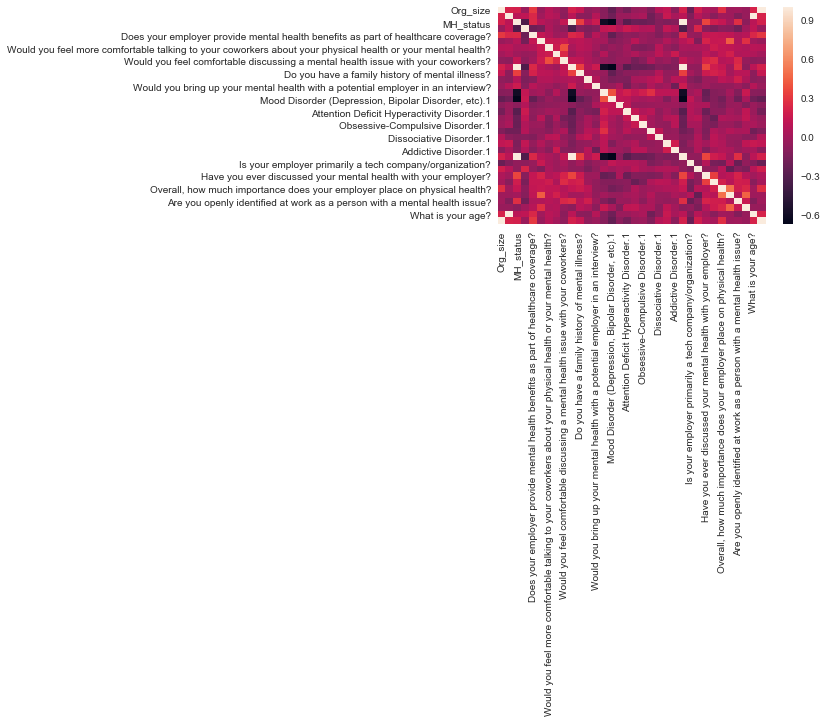

In [66]:
sns.set(font_scale=1)
sns.heatmap(auto_correlations)

In [45]:
sns.set(font_scale=3)
sns.pairplot(final_unsuper)

ValueError: Width and height specified must be non-negative

In [ ]:
curr_mh = surveyData_cat['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(curr_mh.index, curr_mh.values,  alpha=0.9 , order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Current mental health status')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.show()

In [ ]:
mh_by_size= surveyData_cat.groupby('How many employees does your company or organization have?')['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(mh_by_size.index, mh_by_size.values,  alpha=0.9)
plt.title('Current mental health status across company sizes')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
mh_by_options= surveyData_cat.groupby('Do you currently have a mental health disorder?')['Do you know the options for mental health care available under your employer-provided health coverage?'].value_counts(normalize=True)
sns.barplot(mh_by_options.index, mh_by_options.values,  alpha=0.9, order = answers)
plt.title('Mental health status and knowledge of mental health options')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
mental = surveyData_cat['Do you currently have a mental health disorder?'].unique()
options = surveyData_cat['Do you know the options for mental health care available under your employer-provided health coverage?'].unique()
options = options[0:2]
mental = [mental[1], mental[2]]
answers = ((mental[0], options[0]), (mental[0], options[1]), (mental[1], options[0]), (mental[1], options[1]))
plt.show()

In [ ]:
willingness = surveyData.groupby('Do you currently have a mental health disorder?')['How willing would you be to share with friends and family that you have a mental illness?'].median()
sns.barplot(willingness.index, willingness.values,  alpha=0.9, order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Willingness to share across mental health status')
plt.ylabel('Median willingenss', fontsize=12)
plt.xlabel('Do you currently have a mental health disorder?', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
surveyData_cont_clean = surveyData[['Org_size', 'Gender_cat', 'What is your age?', 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'How willing would you be to share with friends and family that you have a mental illness?', 'Overall, how well do you think the tech industry supports employees with mental health issues?', 'MH_status']]
surveyData_cont_clean['How willing would you be to share with friends and family that you have a mental illness?'].unique()


In [ ]:
sns.regplot(y="MH_status", x="What is your age?", data=surveyData_final)

In [ ]:
sns.regplot(y="MH_status", x="Gender_cat", data=surveyData_final)

In [ ]:
#sns.regplot(y="MH_status", x="Org_size", data=surveyData_final)
sns.regplot(y="MH_status", x="Org_size", data=surveyData_final,  x_estimator=np.mean)

In [ ]:
#sns.regplot(y="MH_status", x="Org_size", data=surveyData_final)
sns.regplot(y="MH_status", x="Overall, how well do you think the tech industry supports employees with mental health issues?", data=surveyData_final,  x_estimator=np.mean)

In [ ]:
auto_correlations = surveyData_short.corr()
auto_correlations

In [ ]:
sns.heatmap(auto_correlations)

In [ ]:
sns.set(font_scale=3)
sns.pairplot(surveyData_short, x_vars = ['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support'], y_vars = ['MH_status'], kind = "reg", size=6, aspect=0.8)

In [ ]:
sns.set(font_scale=2)
sns.pairplot(surveyData_short, hue = 'MH_status', diag_kind = 'kde', kind = 'reg')

In [ ]:
X = surveyData_short[['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support']]
y = surveyData_short.MH_status

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
# Instantiate and fit the Linear regression object
linreg = LinearRegression()
linreg.fit(X, y)
# predict outcomes
outcome_pred = linreg.predict(X)

In [ ]:
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

In [ ]:
mae = metrics.mean_absolute_error(y_pred, y)
mse = metrics.mean_squared_error(y_pred, y)
rmse = np.sqrt(mse)
print('model with one feature:')
print('mae: ', mae, 'mse: ', mse, 'rmse: ', rmse)

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support']
X_mult = surveyData_short[feature_cols]
y_mult = surveyData_short.MH_status

# Instantiate and fit the Linear regression object
linreg_m = LinearRegression()
linreg_m.fit(X_mult, y_mult)

# predict outcomes
outcome_pred_m = linreg_m.predict(X_mult)

In [ ]:
y_pred_mult = linreg_m.predict(X_mult)
metrics.r2_score(y_mult, y_pred_mult)

In [ ]:
mae_m = metrics.mean_absolute_error(y_pred_mult, y)
mse_m = metrics.mean_squared_error(y_pred_mult, y)
rmse_m = np.sqrt(mse_m)
print('model with all feature:')
print('mae: ', mae_m, 'mse: ', mse_m, 'rmse: ', rmse_m)

In [ ]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred, color='red')

In [ ]:
outcome_pred

In [ ]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 1.5, 3, 0)
outcome_pred_class

In [ ]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred_class, color='red')

In [ ]:
# add predicted class to DataFrame
surveyData_short['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
surveyData_short.sort_values('Age', inplace=True)

In [ ]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, surveyData_short.outcome_pred_class, color='red')

In [ ]:
# create logistic regression object
logreg = LogisticRegression(C=1e9)
# create X and y
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
#fit the model
logreg.fit(X, y)
# create predictions
outcome_pred_class_log = logreg.predict(X)

In [ ]:
# print the class predictions
outcome_pred_class_log

In [ ]:
# plot the class predictions
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred_class_log, color='red')

In [ ]:
# store the predicted probabilites of class 1 only
outcome_probs = logreg.predict_proba(X)[:, 1]
outcome_probs

In [ ]:
# plot the predicted probabilities, and the 50% line
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_probs, color='red')
plt.plot(surveyData_short.Age, np.ones(outcome_probs.shape)*1.5,'k--')

In [ ]:
# create logistic regression object
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
# create X and y
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
#fit the model
mul_lr.fit(X, y)
outcome_pred_class_log_mul = mul_lr.predict(X)

In [ ]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

In [ ]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class_log
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

In [ ]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class_log_mul
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

In [ ]:
surveyData_short.head()

In [ ]:
feature_cols = ['Age', 'Org_size']
X = surveyData_short.drop(['MH_status', 'outcome_pred_class'], axis=1)
y = surveyData_short.MH_status

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
logreg.coef_

In [ ]:
outcome_predictions = logreg.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

In [ ]:
feature_cols = ['Age', 'Org_size']
X = surveyData_short.drop(['outcome_pred_class', 'MH_status'], axis=1)
y = surveyData_short.MH_status

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)


logreg_mult = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg_mult.fit(X_train, y_train)

In [ ]:
logreg_mult.coef_

In [ ]:
outcome_predictions = logreg_mult.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

Decision Trees


In [ ]:
X = surveyData_short.drop(['outcome_pred_class', 'MH_status'], axis=1)
y = surveyData_short.MH_status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=20)

decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test))))

In [ ]:
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
plt.plot(depths,train_rmse,label='train_rmse')
plt.plot(depths,test_rmse,label='test_rmse')
plt.xlabel("maximum tree depth")
plt.ylabel("rmse - lower is better")
plt.legend()

In [ ]:
# max_depth=2 was best, so fit a tree using that parameter
best_single_tree = DecisionTreeRegressor(max_depth=1, random_state=1)
best_single_tree.fit(X_train, y_train)

In [ ]:
pd.DataFrame({'feature': list(X), 'importance':best_single_tree.feature_importances_})

In [ ]:
# use fitted model to make predictions on testing data
y_pred = best_single_tree.predict(X_test)
y_pred

In [ ]:
# calculate test set RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# fit a classification tree with max_depth=3 on all of the training data
from sklearn.tree import DecisionTreeClassifier
occupancy_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
occupancy_tree.fit(X_train, y_train)

In [ ]:
print( accuracy_score(y_test,occupancy_tree.predict(X_test)))
1- (float(y_train.sum())/y_train.shape[0])

In [ ]:
# compute the feature importances
pd.DataFrame({'feature':list(X), 'importance':occupancy_tree.feature_importances_})

Bootstrapping

In [ ]:
# set a seed for reproducibility
np.random.seed(1234)

# create ten bootstrap samples (will be used to select rows from the DataFrame)

samples = [np.random.choice(a=X_train.shape[0], size=X_train.shape[0], replace=True) for _ in range(1, 11)]
samples

In [ ]:
# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted compressive strength from each tree
predictions = []

# define testing data
X_test_boot = X_test
y_test_boot = y_test

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train_boot = X_train.iloc[sample, :]
    y_train_boot = y_train.iloc[sample]
    treereg.fit(X_train_boot, y_train_boot)
    y_pred_boot = treereg.predict(X_test_boot)
    predictions.append(y_pred_boot)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions.shape

In [ ]:
# average the predictions
np.mean(predictions, axis=0)

In [ ]:
# calculate RMSE for bagged regression trees
y_pred_boot = np.mean(predictions, axis=0)
print("Bagged RMSE:",np.sqrt(mean_squared_error(y_test_boot, y_pred_boot)))

#calculate RMSE for single decision tree with same exact parameters as each tree in the bag
single_tree = DecisionTreeRegressor(max_depth=None, random_state=123)
single_tree.fit(X_train,y_train)
y_pred_single = single_tree.predict(X_test)
print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test_boot, y_pred_single)))

In [ ]:
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1234)
# fit and predict
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)
y_pred_bag

In [ ]:
# calculate RMSE
print("Bagged RMSE with 500 trees:",np.sqrt(mean_squared_error(y_test, y_pred_bag)))

In [ ]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for b=500
bagreg.oob_score_

In [ ]:
#Single Tree
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=123)
best_single_tree.fit(X_train, y_train)
y_pred_single = best_single_tree.predict(X_test)

#Bag of 500 trees
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)

#Random forest of 500 trees
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_single)))
print("Bag RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

In [ ]:
# list of values to try for n_estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# list of values to try for max_features
feature_range = range(1, len(list(X))+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=400, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [ ]:
rfreg_best = RandomForestRegressor(n_estimators=500, max_features=1, bootstrap=True, oob_score=True, random_state=123)
rfreg_best.fit(X_train,y_train)
preds = rfreg_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("Best RMSE:",rmse)

In [ ]:
# compute feature importances
pd.DataFrame({'feature':list(X), 'importance':rfreg_best.feature_importances_})

In [ ]:
X_train.head()